In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import rc
import seaborn as sns
rc('font',**{'family':'serif','serif':['Arial']})
plt.rcParams['pdf.fonttype'] = 42
rc('xtick', labelsize=7) 
rc('ytick', labelsize=7) 


In [83]:
# dataframe with percent change values at each timepoint
pc_df=pd.read_csv('2020-06-25_CPDseq/pc_df_TTgreaterthan5',index_col=0)
pc_df=pc_df[pc_df>0]
# RNA-Seq RPKMs
TS_rpkm=pd.read_csv('2018-05-22_RNAseq/TS_rpkm.csv',index_col=0)
NTS_rpkm=pd.read_csv('2018-05-22_RNAseq/NTS_rpkm.csv',index_col=0)
# combine all data into one dataframe
joined1=pc_df.join(TS_rpkm)
joined2=joined1.join(NTS_rpkm)

In [84]:
ratio_df=pd.DataFrame()
ratio_df['TS/NTS']=joined2['bm03_TS']/joined2['bm03_NTS']
ratio_df['TS/NTS_pc']=joined2['wt_20_TS']/joined2['wt_20_NTS']
ratio_df=ratio_df.dropna()

In [85]:
ratio_df=ratio_df.sort_values(by='TS/NTS_pc',ascending=False)

In [86]:
ratio_df


,TS/NTS,TS/NTS_pc
gene,,
fdhE,66.720930,300.210468
dadX,232.400000,128.037389
aceF,442.800000,118.822620
rfbA,742.000000,83.864194
glrR,52.000000,54.526191
...,...,...
csgD,27.500000,0.031079
yodB,0.263158,0.009595
yfjW,9.066667,0.003383


In [87]:
high=ratio_df.iloc[:1096,:]
mid=ratio_df.iloc[1096:2192,:]
low=ratio_df.iloc[2192:,:]

In [88]:
x1=np.log2(ratio_df['TS/NTS'].tolist())
x2=np.log2(high['TS/NTS'].tolist())


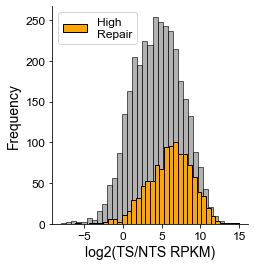

In [169]:
fig, ax= plt.subplots(figsize=(3.5,4))
ax.hist(x1,bins=35,edgecolor='k',color='grey',alpha=0.6)
ax.hist(x2,bins=35,edgecolor='k',color='orange',label='High\nRepair')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

ax.legend(fancybox=True,fontsize=12,loc=2)
ax.set_xlabel('log2(TS/NTS RPKM)',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#ax.tick_params(axis='both', which='major', labelsize=9,rotation=0)

plt.savefig("wt_hist_high_20min.png",bbox_inches='tight',transparent=True,dpi=600)


In [170]:
y1=np.log2(ratio_df['TS/NTS'].tolist())
y2=np.log2(mid['TS/NTS'].tolist())

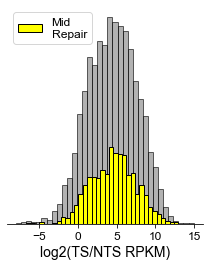

In [171]:
fig, ax= plt.subplots(figsize=(3.5,4))
ax.hist(y1,bins=35,edgecolor='k',color='grey',alpha=0.6)
ax.hist(y2,bins=35,edgecolor='k',color='yellow',label='Mid\nRepair')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.legend(fancybox=True,fontsize=12,loc=2)
ax.set_xlabel('log2(TS/NTS RPKM)',fontname='Arial',fontsize=14)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

plt.savefig("wt_hist_mid_20min.png",bbox_inches='tight',transparent=True,dpi=600)


In [172]:
z1=np.log2(ratio_df['TS/NTS'].tolist())
z2=np.log2(low['TS/NTS'].tolist())


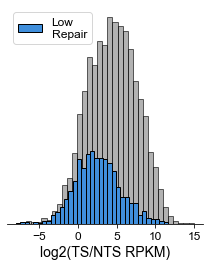

In [173]:
fig, ax= plt.subplots(figsize=(3.5,4))
ax.hist(z1,bins=35,edgecolor='k',color='grey',alpha=0.6)
ax.hist(z2,bins=35,edgecolor='k',color='#408FDC',label='Low\nRepair')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

ax.legend(fancybox=True,fontsize=12,loc=2)
ax.set_xlabel('log2(TS/NTS RPKM)',fontname='Arial',fontsize=14)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

#plt.savefig("wt_hist_low_20min.png",bbox_inches='tight',transparent=True,dpi=600)


In [84]:
m=np.log2(ratio_df['TS/NTS_pc'].tolist())


In [89]:
m2=np.log2(ratio_df['TS/NTS_pc'].tolist())

In [101]:
m3=np.log2(ratio_df['TS/NTS_pc'].tolist())

No handles with labels found to put in legend.


(-5, 5)

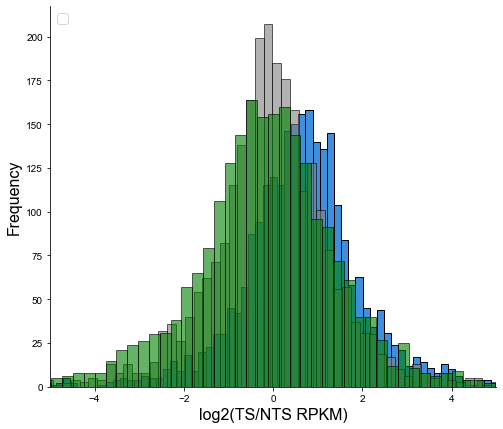

In [102]:
fig, ax= plt.subplots(figsize=(8,7))
ax.hist(m2,bins=100,edgecolor='k',color='#408FDC')
ax.hist(m,bins=100,edgecolor='k',color='grey',alpha=0.6)
ax.hist(m3,bins=100,edgecolor='k',color='green',alpha=0.6)
#ax.hist(m2,bins=35,edgecolor='k',color='#408FDC')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.legend(fancybox=True,fontsize=14,loc=2)
ax.set_xlabel('log2(TS/NTS RPKM)',fontname='Arial',fontsize=16)
ax.set_ylabel('Frequency',fontname='Arial',fontsize=16)
plt.xlim(-5,5)
#plt.savefig("wt_hist_low_20min.pdf",bbox_inches='tight',transparent=True)

In [213]:
tidy_pc=pd.melt(pc_df,var_name='condition',value_name='percent_change')
tidy_pc['background']=tidy_pc['condition'].apply(lambda x:x.split('_')[0])
tidy_pc['timepoint']=tidy_pc['condition'].apply(lambda x:x.split('_')[1])
tidy_pc['strand']=tidy_pc['condition'].apply(lambda x:x.split('_')[2])

In [206]:
pc_df

,wt_10_TS,wt_10_NTS,wt_20_TS,wt_20_NTS,wt_30_TS,wt_30_NTS,wt_40_TS,wt_40_NTS,mfd_10_TS,mfd_10_NTS,...,D210G_40_TS,D210G_40_NTS,L187R_10_TS,L187R_10_NTS,L187R_20_TS,L187R_20_NTS,L187R_30_TS,L187R_30_NTS,L187R_40_TS,L187R_40_NTS
gene,,,,,,,,,,,,,,,,,,,,,
thrA,0.241522,0.020467,0.483275,0.317827,0.598393,0.493800,0.609292,0.546130,0.146740,0.111925,...,0.673943,0.583607,0.241072,0.049486,0.529636,0.356530,0.595863,0.529425,0.597109,0.547880
thrB,0.278833,NaN,0.512750,0.077537,0.701453,0.490411,0.668000,0.410701,0.222318,0.214997,...,0.655920,0.652459,0.242532,0.070855,0.501269,0.407245,0.580340,0.510850,0.597986,0.603403
thrC,0.198214,0.120130,0.636599,0.306762,0.618960,0.495662,0.648352,0.613420,0.109375,0.132604,...,0.612291,0.656330,0.313941,0.057925,0.516154,0.372229,0.660572,0.497910,0.546368,0.597415
yaaA,0.180754,0.167100,0.613239,0.462606,0.700985,0.707630,0.672611,0.672611,0.081261,0.144130,...,0.658015,0.693599,0.322223,0.379658,0.462089,0.614489,0.564085,0.681354,0.635091,0.577867
yaaJ,0.045539,0.184196,0.442389,0.371300,0.473095,0.601523,0.565177,0.685542,0.201240,0.085054,...,0.626969,0.705225,0.224230,0.097110,0.369309,0.460559,0.558852,0.595717,0.587064,0.604395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
creA,0.446602,0.166869,0.626316,0.368107,0.571610,0.516846,0.539488,0.670392,0.149858,0.186326,...,0.731339,0.726386,0.111462,0.287219,0.640900,0.433470,0.598178,0.669552,0.635977,0.653375
creB,0.254938,0.169117,0.547764,0.301541,0.758277,0.582625,0.647348,0.578115,0.276069,0.195123,...,0.583372,0.548235,0.179474,0.071289,0.523910,0.383656,0.600364,0.423904,0.632652,0.600278
creC,0.220812,0.028150,0.396068,0.308501,0.605716,0.426726,0.661664,0.541656,0.053046,0.124759,...,0.677715,0.654588,0.267467,0.153612,0.503402,0.416494,0.669428,0.571790,0.614209,0.578324


In [209]:
temp=high_ratio.iloc[:,:0]

In [212]:
pc_df=temp.join(pc_df)

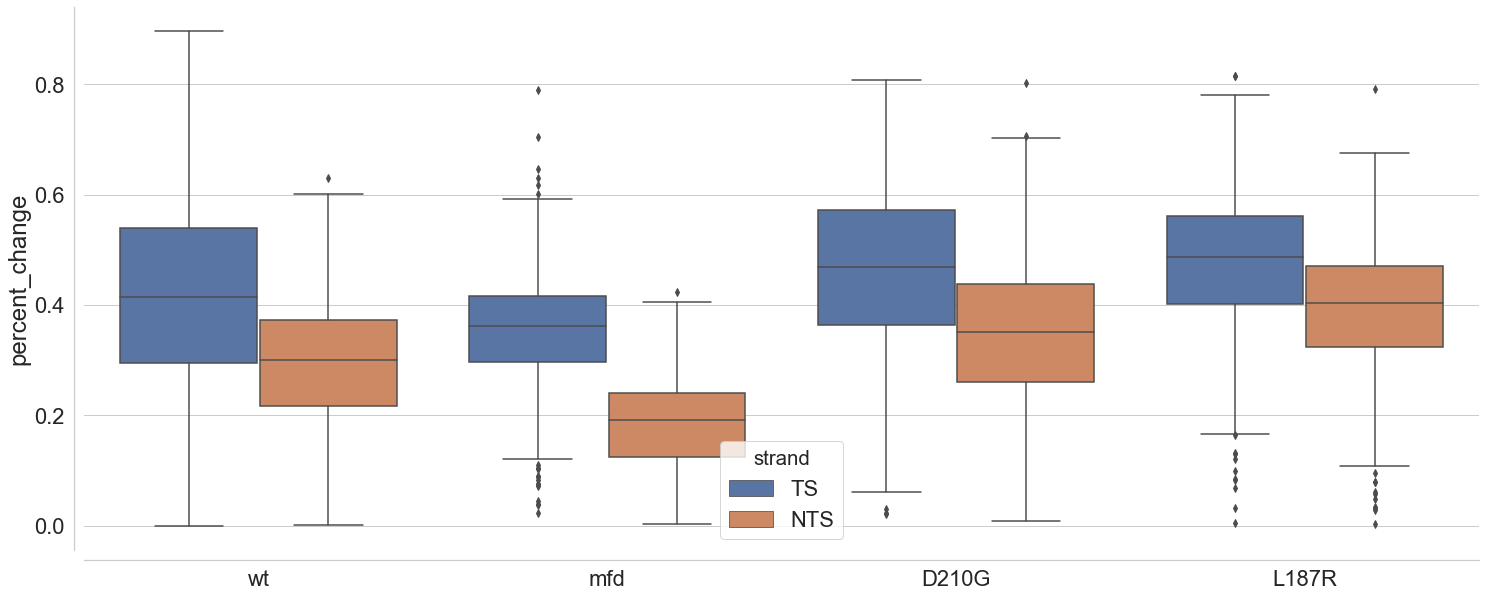

In [218]:
tenmin=tidy_pc[tidy_pc['timepoint']=='20']
#tenmin=tenmin[(tenmin['background']=='wt') | (tenmin['background']=='L187R')|(tenmin['background']=='D210G')]
sns.set(font_scale = 2)
sns.set_style("whitegrid")
plt.figure(figsize=(25,10))
my_pal = {"mfd": "#266FAF", "mfdrif": "#C1CAC8"}
sns.boxplot(x='background',y='percent_change',hue='strand',data=tenmin)
#sns.stripplot(x='background',y='percent_change',hue='strand',data=tenmin)
plt.xlabel("")
#plt.ylim(-0.1,0.3)
#plt.yticks(np.arange(-0.1, 0.3, 0.1))
#plt.title("genes where L187R increases NTS transcription (801)")
sns.despine(offset=10 )